In [70]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [71]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
x_train.shape

(60000, 784)

In [73]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    
    c = np.max(x)
    exp_a = np.exp(x-c)
    return exp_a / np.sum(exp_a)

In [74]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, -1)
        t = t.reshape(1, -1)
    batch_size = float(y.shape[0])
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [75]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self, x):
        self.mask = (x <= 0)
        x[self.mask] = 0
        return x
    
    def backward(self, dout):
        dout[self.mask] = 0
        return dout

In [226]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        return dout * (1.0 - self.out) * self.out

In [227]:
class Affine:
    def __init__(self, input_size, output_size, std=0.01, lr=0.01):
        self.lr = lr
        self.W, self.b = np.random.randn(input_size, output_size) * std, np.zeros(output_size)
        self.x = None
        self.dW, self.db = None, None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        self.W = self.W - self.lr*self.dW
        self.b = self.b - self.lr*self.db
        return dx

In [228]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        return (self.y - self.t) / float(batch_size)

In [238]:
def model():
    h1 = Affine(input_size=784, output_size=100, lr=0.01)
    relu1 = ReLU()
    h2 = Affine(input_size=100, output_size=10, lr=0.01)
    softmaxwithloss = SoftmaxWithLoss()
    return [h1, relu1, h2], softmaxwithloss
    
def train(models, last_layer, x_train, t_train, x_test, t_test, batch_size, epochs):
    global train_acc, test_acc
    for i in range(epochs):
        test = x_test
        batch = np.random.choice(x_train.shape[0], batch_size)
        train = x_train[batch]
        label = t_train[batch]
        
        for layer in models:
            test = layer.forward(test)
        
        if i % 100 == 0:
            x2 = np.argmax(test, axis=1)
            t2 = np.argmax(t_test, axis=1)
            test_accuracy = np.sum(x2 == t2) / len(x2)
            test_acc.append(test_accuracy)
            print('test accuracy = ', test_accuracy)
        
        for num, layer in enumerate(models):
            train = layer.forward(train)
            
        if i % 100 == 0:
            x1 = np.argmax(train, axis=1)
            t1 = np.argmax(label, axis=1)
            
            train_accuracy = np.sum(x1 == t1) / len(x1)
            train_acc.append(train_accuracy)
            print('train accuracy = ', train_accuracy)
        last_layer.forward(train, label)
        dout = 1
        dout = last_layer.backward(dout)
        
        for layer in models[::-1]:
            dout = layer.backward(dout)   
    return models, last_layer

In [239]:
def predict(models, last_layer, x, t):
    for layer in models:
        x = layer.forward(x)
    y = np.argmax(x, axis=1)
    t = np.argmax(t, axis=1)
    print(np.sum(y==t) / len(y))

In [240]:
models, last_layer = model()
train_acc, test_acc = [], []

In [241]:
models, last_layer = train(models, last_layer, x_train, t_train, x_test, t_test, 100, 5000)

test accuracy =  0.0844
train accuracy =  0.11
test accuracy =  0.3705
train accuracy =  0.4
test accuracy =  0.4796
train accuracy =  0.44
test accuracy =  0.6024
train accuracy =  0.64
test accuracy =  0.5547
train accuracy =  0.62
test accuracy =  0.5881
train accuracy =  0.62
test accuracy =  0.6516
train accuracy =  0.59
test accuracy =  0.6963
train accuracy =  0.64
test accuracy =  0.7371
train accuracy =  0.78
test accuracy =  0.761
train accuracy =  0.76
test accuracy =  0.7903
train accuracy =  0.79
test accuracy =  0.7975
train accuracy =  0.84
test accuracy =  0.8177
train accuracy =  0.88
test accuracy =  0.8263
train accuracy =  0.81
test accuracy =  0.8364
train accuracy =  0.85
test accuracy =  0.8464
train accuracy =  0.88
test accuracy =  0.8531
train accuracy =  0.86
test accuracy =  0.8581
train accuracy =  0.77
test accuracy =  0.8651
train accuracy =  0.81
test accuracy =  0.8681
train accuracy =  0.9
test accuracy =  0.8724
train accuracy =  0.9
test accuracy =  

In [ ]:
predict(models, last_layer, x_test, t_test)

In [242]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch/100')

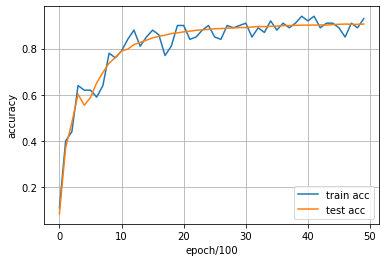

In [243]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test acc')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch/100')